In [ ]:
import time
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import plotly.express as px
import dockersim
import utils
import seaborn as sns

: 

In [2]:
def simulate(a, b, rng=np.random.default_rng()):
    data = rng.normal(loc=a, size=(b,))
    # time.sleep(0.4)
    return data

In [5]:
tasks = [{"run_nr": run, "a": 2, "b": 100} for run in range(1000)]
sim = dockersim.DockerSim(simulate, tasks, 1234)
# sim.run()

  0%|          | 0/1000 [00:00<?, ?runs/s]

100%|██████████| 1000/1000 [00:06<00:00, 164.95runs/s]


In [6]:
df = pl.scan_csv("results_*.csv")

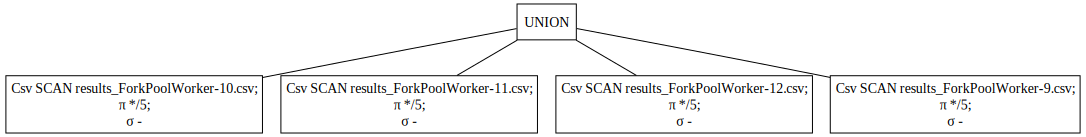

In [7]:
df.show_graph()

In [8]:
q = df.groupby(["a", "b", "series"]).median()

<AxesSubplot: xlabel='series', ylabel='value'>

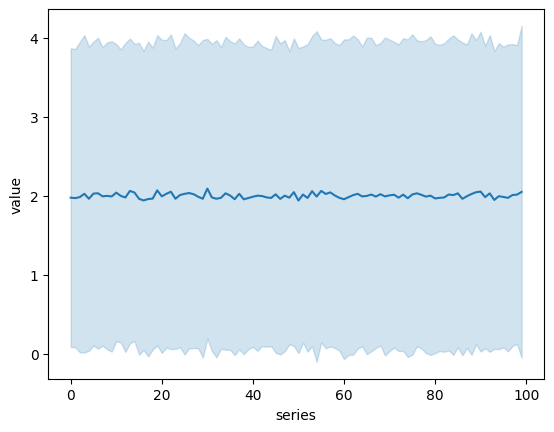

In [11]:
sns.lineplot(df.collect(), x="series", y="value", errorbar=("sd", 1.96))